Number of instances = 315
Number of attributes = 14

    age sex cp trestbps chol fbs restecg thalach exang oldpeak slope   ca  \
0    63   1  1      145  233   1       2     150     0     2.3     3    0   
1    67   1  4      160  286   0       2     108     1     1.5     2    3   
2    67   1  4      120  229   0       2     129     1     2.6     2    2   
3    37   1  3      130  250   0       0     187     0     3.5     3    0   
4    41   0  2        ?  204   0       2     172     0     1.4     1    0   
..   ..  .. ..      ...  ...  ..     ...     ...   ...     ...   ...  ...   
310  57   1  4      130  131   0       0     115     1     1.2     2    1   
311  57   0  2      130  236   0       2     174     0       0     2    1   
312  38   1  3      138  175   0       0     173     0       0     1  NaN   
313  57   1  4      130  131   0       0     115     1     1.2     2    1   
314   ?   ?  ?        ?    ?   ?       ?       ?     ?       ?     ?    ?   

    thal num  
0      

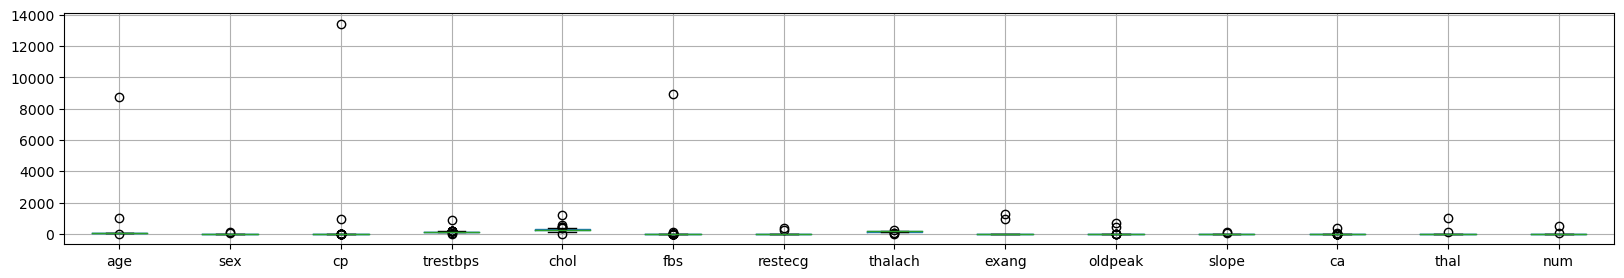

Number of rows before discarding outliers = 308
Number of rows after discarding outlier values = 303
          age       sex        cp  trestbps      chol       fbs   restecg  \
0   -0.045181 -0.020753 -0.063683  0.242354 -0.200865 -0.056087 -0.037584   
1   -0.037140 -0.020753 -0.059772  0.556605  0.487406 -0.058049 -0.037584   
2   -0.037140 -0.020753 -0.059772 -0.281397 -0.252810 -0.058049 -0.037584   
3   -0.097451 -0.020753 -0.061076 -0.071897  0.019901 -0.058049 -0.120865   
4   -0.089409 -0.162793 -0.062380 -0.071897 -0.577466 -0.058049 -0.037584   
..        ...       ...       ...       ...       ...       ...       ...   
309 -0.035129 -0.020753 -0.059772  0.221404 -0.720314 -0.056087 -0.120865   
310 -0.057243 -0.020753 -0.059772 -0.071897 -1.525461 -0.058049 -0.120865   
311 -0.057243 -0.162793 -0.062380 -0.071897 -0.161906 -0.058049 -0.037584   
312 -0.095440 -0.020753 -0.061076  0.095704 -0.954067 -0.058049 -0.120865   
314 -0.059254 -0.020753 -0.061076 -0.071897 -0.10996

In [4]:
import numpy as nm
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore

#reads and copies the data from the csv file
data = pd.read_csv('/Users/alicialuna/csc177-group-project copy/uci_heartDisease_changed.csv',)
#prints out original data
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d\n' % (data.shape[1]))
print(data)
#------------------------------------------------------------------------------------------
#detects duplicated data and deletes it in another copy of data
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print('Now discarding duplicate rows')
data2 = data.drop_duplicates()
print('Number of instances = %d\n' % (data2.shape[0]))
print(data2)
#------------------------------------------------------------------------------------------
#Changes the missing values
data3 = data2.replace('?',nm.NaN)
print(data3)

#Counts number of missing values
print('Number of missing values:')
for col in data3.columns:
    print('\t%s: %d' % (col,data3[col].isna().sum()))

#Fills in missing values with the median of the columns
print('\nLet us fill in the missing values')
for col in data3.columns:
    column = '%s' % col
    datacol = data3[column]
    data3[column] = datacol.fillna(datacol.median())

#Recounts missing values and prints new dataset
print('\nNumber of missing values:')
for col in data3.columns:
    print('\t%s: %d' % (col,data3[col].isna().sum()))
print(data3)
#------------------------------------------------------------------------------------------
#Finding outliers
for col in data3.columns:
    column = '%s' % col
    datacol = data3[column]
    data3[column] = pd.to_numeric(data3[column])
data3.boxplot(figsize=(20,3))
plt.show()

#calculate z scores to delete outliers
Z = (data3-data3.mean())/data3.std()
print('Number of rows before discarding outliers = %d' %(Z.shape[0]))
Z2 = Z.loc[((Z > -3).sum(axis=1)==14) & ((Z <= 3).sum(axis=1)==14),:]
print('Number of rows after discarding outlier values = %d' % (Z2.shape[0]))
print(Z2)